<a href="https://colab.research.google.com/github/ayushshah04/Algorithmic-Trading-Strategy-Using-Python/blob/main/Algorithmic_Trading_Strategy_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description : This Program uses the Dual Program use the Dual moving average crossover to determine when to buy and sell stock
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL (1).csv


In [ ]:
#Store the data 
AAPL = pd.read_csv('AAPL.csv')
#show the data 
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-29,66.650002,67.000000,66.474998,66.812500,65.702515,46617600
1,2019-12-02,66.817497,67.062500,65.862503,66.040001,64.942841,94487200
2,2019-12-03,64.577499,64.882500,64.072502,64.862503,63.784916,114430400
3,2019-12-04,65.267502,65.827499,65.169998,65.434998,64.347893,67181600
4,2019-12-05,65.947502,66.472504,65.682503,66.394997,65.291946,74424400
...,...,...,...,...,...,...,...
247,2020-11-20,118.639999,118.769997,117.290001,117.339996,117.339996,73391400
248,2020-11-23,117.180000,117.620003,113.750000,113.849998,113.849998,127959300
249,2020-11-24,113.910004,115.849998,112.589996,115.169998,115.169998,113874200
250,2020-11-25,115.550003,116.750000,115.169998,116.029999,116.029999,76499200


No handles with labels found to put in legend.


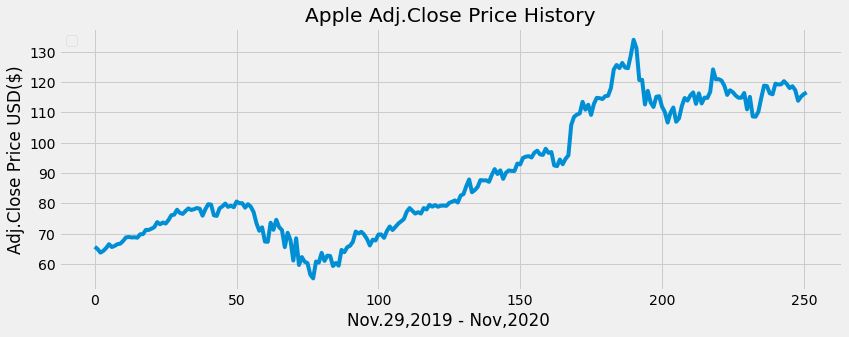

In [ ]:
#Visualize the data
plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Adj Close'])
plt.title('Apple Adj.Close Price History')
plt.xlabel('Nov.29,2019 - Nov,2020 ')
plt.ylabel('Adj.Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#create the simple moving average with a 30 day window
SMA30 =pd.DataFrame()
SMA30['Adj Close Price'] = AAPL['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
247,116.887586
248,116.543061
249,116.352346
250,116.187303


In [ ]:
#create a simple moving 100 day average 
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = AAPL['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
247,111.878041
248,112.109469
249,112.329833
250,112.561686


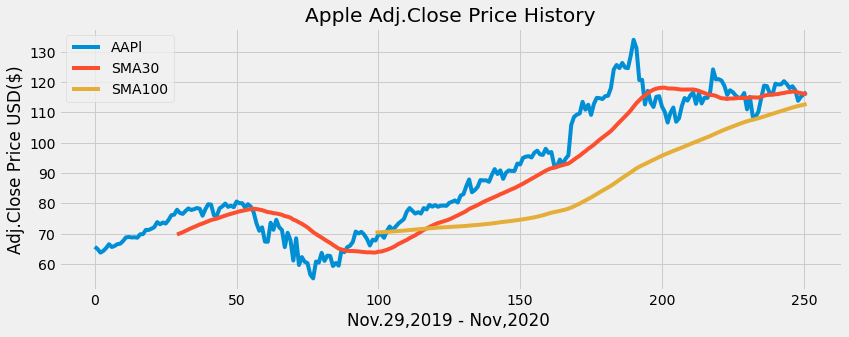

In [ ]:
#Visualize the Data 
plt.figure(figsize=(12.5,4.5))
plt.plot(data['AAPL'],label ='AAPl')
plt.plot(data['SMA30'],label = 'SMA30')
plt.plot(data['SMA100'],label = 'SMA100')
plt.title('Apple Adj.Close Price History')
plt.xlabel('Nov.29,2019 - Nov,2020 ')
plt.ylabel('Adj.Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#create a new data frame to store all the data
data = pd.DataFrame()
data['AAPL'] = AAPL['Adj Close']
data['SMA30'] = SMA30['Adj Close Price']
data['SMA100'] =SMA100['Adj Close']
data

,AAPL,SMA30,SMA100
0,65.702515,NaN,NaN
1,64.942841,NaN,NaN
2,63.784916,NaN,NaN
3,64.347893,NaN,NaN
4,65.291946,NaN,NaN
...,...,...,...
247,117.339996,116.887586,111.878041
248,113.849998,116.543061,112.109469
249,115.169998,116.352346,112.329833
250,116.029999,116.187303,112.561686


In [ ]:
#Create a function to signal when to buy and sell the asset/Stock
def buy_sell(data):
  sigPriceBuy =[]
  sigPriceSell=[]
  flag= -1
  for i in range(len(data)):
   if data['SMA30'][i] > data['SMA100'][i]:
     if flag !=1:
       sigPriceBuy.append(data['AAPL'][i])
       sigPriceSell.append(np.nan)
       flag = 1
     else:
         sigPriceBuy.append(np.nan)
         sigPriceSell.append(np.nan)
   elif data['SMA30'][i] < data['SMA100'][i]:    
          if flag !=0:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(data['AAPL'][i])
            flag = 0
          else:
              sigPriceBuy.append(np.nan)
              sigPriceSell.append(np.nan)
  else:
              sigPriceBuy.append(np.nan)
              sigPriceSell.append(np.nan)
  return (sigPriceBuy,sigPriceSell)      

In [ ]:
#Sotre the Buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] =  buy_sell[0]
data['Sell_Signal-Price'] = buy_sell[1]

ValueError: ignored

In [ ]:
data

,AAPL,SMA30,SMA100
0,65.702515,NaN,NaN
1,64.942841,NaN,NaN
2,63.784916,NaN,NaN
3,64.347893,NaN,NaN
4,65.291946,NaN,NaN
...,...,...,...
247,117.339996,116.887586,111.878041
248,113.849998,116.543061,112.109469
249,115.169998,116.352346,112.329833
250,116.029999,116.187303,112.561686


KeyError: ignored

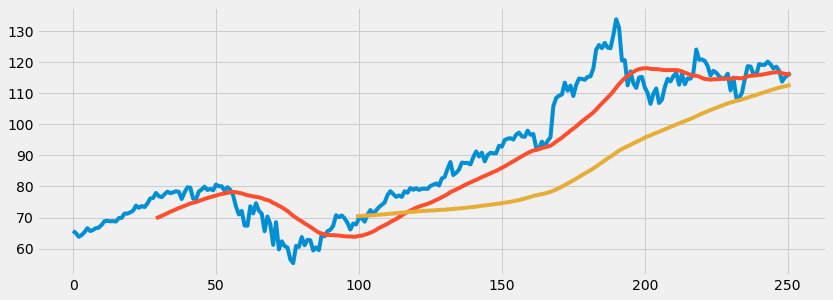

In [ ]:
#Visualize the data and strategy to buy and sell the stock
plt.figure(figsize=(12.6,4.6))
plt.plot(data['AAPL'],label ='AAPl')
plt.plot(data['SMA30'],label = 'SMA30')
plt.plot(data['SMA100'],label = 'SMA100')
plt.scatter(data.index,data['Buy_Signal_Price'],label = 'Buy',marker ='^',color ='green')
plt.scatter(data.index,data['Sell_Signal-Price'],label ='Sell',marker ='V',color ='red')
plt.title('Apple Adj. Close Price History But &Sell Signals')
plt.xlabel('Nov.29,2019 - Nov,2020')
plt.ylabel('Adj.Close Price USD($)')
plt.legend(loc='upper left')
plt.show()
